In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Load Dataset

In [2]:
# Load dataset
dataset_dir = '/content/drive/MyDrive/1.Projects/Data Science/House_price_prediction/housing.csv'
df = pd.read_csv(dataset_dir)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Data Cleaning



*   Drop any irrelevant columns
*   Fill in any missing values
*   Remove any duplicated rows
*   Ensure consistent formatting
    * Column names
    * Removing white spaces and extra characters
    * Data types of columns
*   Aggregate redundant columns



## Initial feature engineering

### Drop irrelevant columns

Most of the features are numerical and seems to be all relevant to the house price. None will be dropped



## Imputing Missing Values

In [3]:
df.shape

(20640, 10)

In [4]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


Looks like there are 207 missing values in the total_bedrooms column.

To determine how to impute the missing values, we will first look at the distribution of the total_bedrooms column.


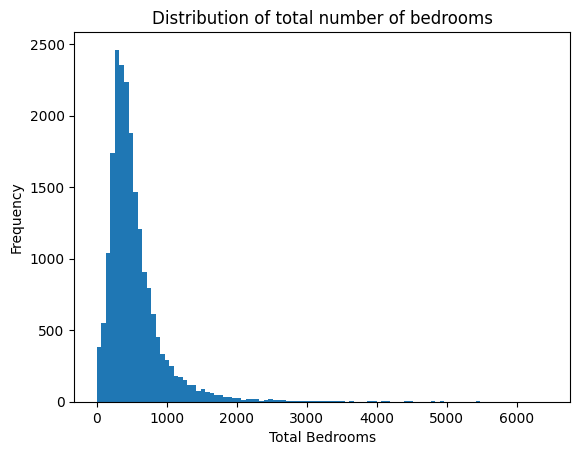

In [5]:
# Distribution of total_bedrooms

df['total_bedrooms'].plot(kind='hist', bins=100)
plt.title('Distribution of total number of bedrooms')
plt.xlabel('Total Bedrooms')
plt.show()

Since the distribution of the total_bedrooms column is left skewed, we will use **median** to inpute the missing values

In [6]:
# impute missing values with median

df.loc[df['total_bedrooms'].isna(), 'total_bedrooms'] = df['total_bedrooms'].median()


In [7]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


## Change datatype of a few columns

In [8]:
df.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity,object


As seen above, it doesn't make sense for total_rooms, total_bedrooms, population, and households to be a float64. They all should be a whole integer number.

In [9]:
# Convert columns to integer

df = df.astype({
    'total_rooms': 'int32',
    'total_bedrooms': 'int32',
    'population': 'int32',
    'households': 'int32'
})

print(df.dtypes)
df

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms             int32
total_bedrooms          int32
population              int32
households              int32
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880,129,322,126,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099,1106,2401,1138,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467,190,496,177,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274,235,558,219,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627,280,565,259,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665,374,845,330,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697,150,356,114,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254,485,1007,433,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860,409,741,349,1.8672,84700.0,INLAND


Done! No more missing values.

## Distinguish categorical and numerical columns

In [10]:

numerical_cols = []
categorical_cols = []
for column in df:
  if df[column].dtype != 'O':
    numerical_cols.append(column)
  else:
    categorical_cols.append(column)

In [11]:
print(f'Numerical columns: {numerical_cols}')
print(f'Categorical columns: {categorical_cols}')

Numerical columns: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
Categorical columns: ['ocean_proximity']


## Duplicated rows

In [12]:
df.loc[df.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


No duplicated rows!

# Feature Understanding

In [13]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [14]:
df.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,int32
total_bedrooms,int32
population,int32
households,int32
median_income,float64
median_house_value,float64
ocean_proximity,object


### Distribution of numerical features

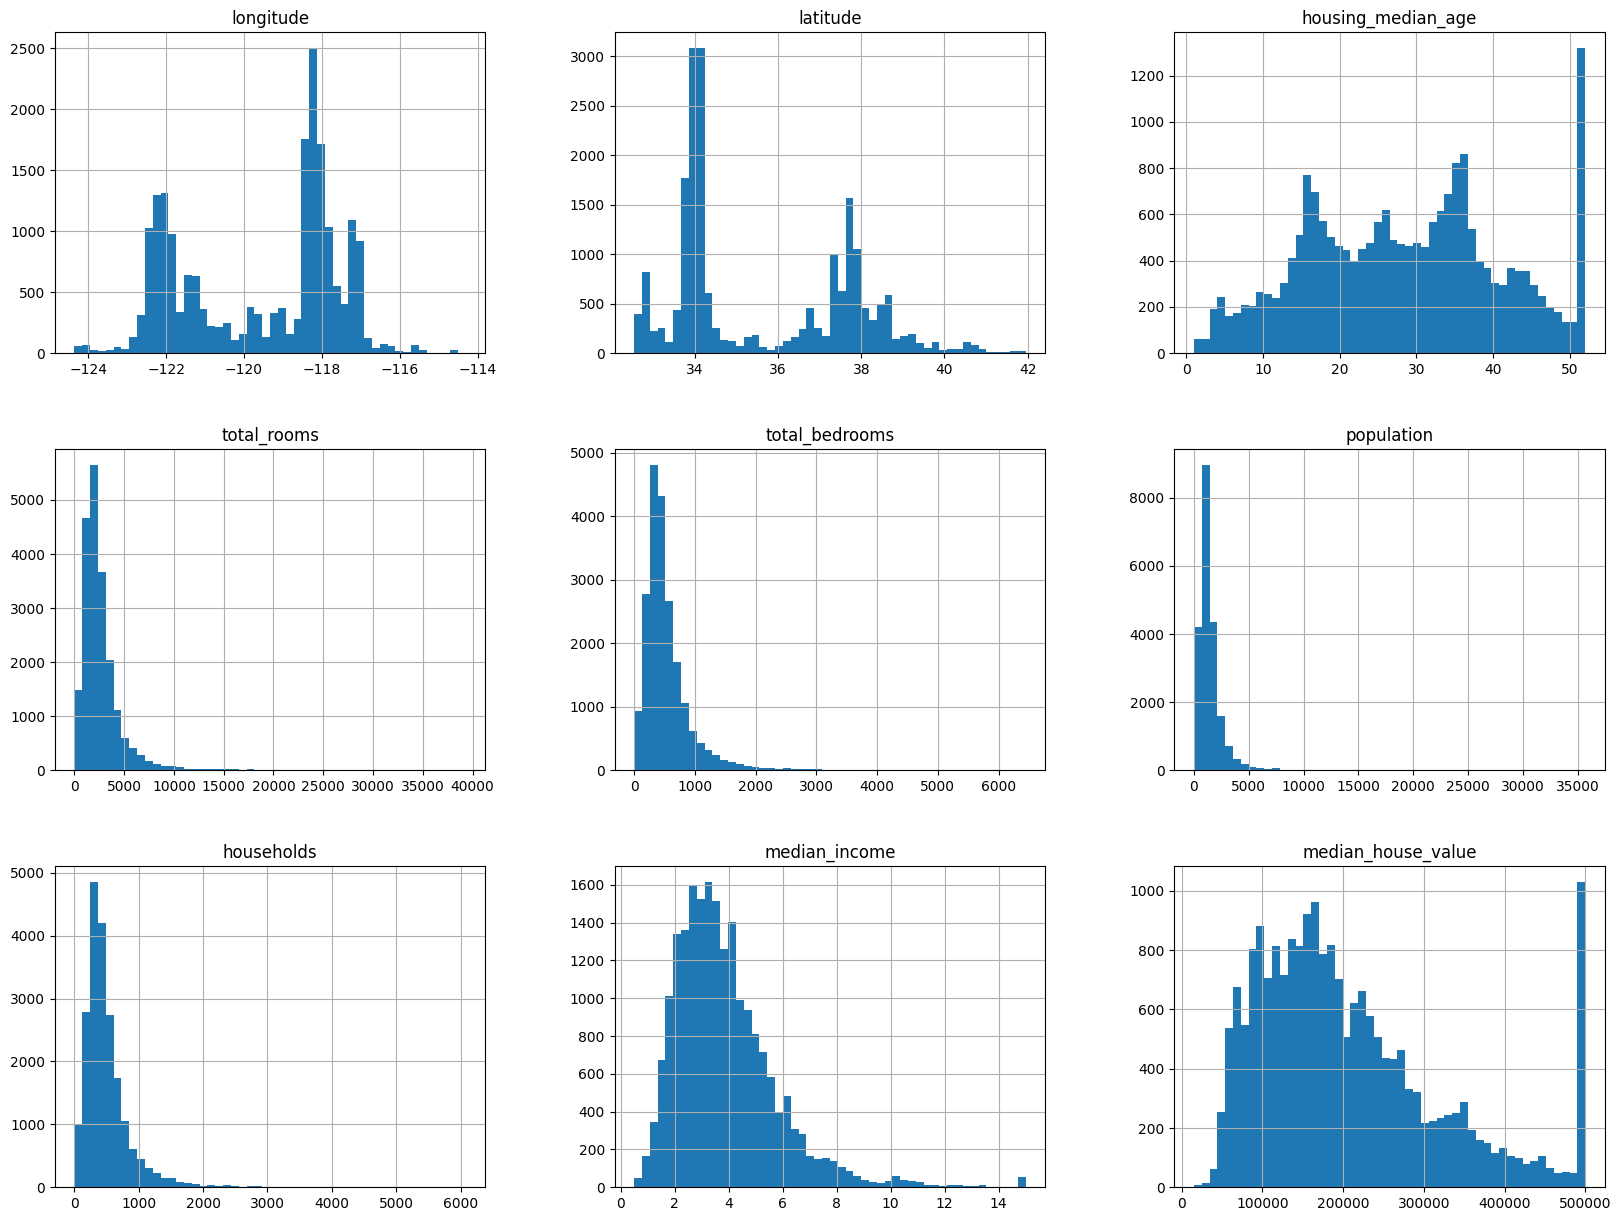

In [15]:
# Use built-in histograms in pandas
df.hist(bins=50, figsize=(20,15))
plt.show()

Things I noticed:
*  Most of them are skewed. We will need to scale them later
*  median_income's scale is different from others. We will need to put all of them in the same scale later.

## Correlation between numerical values

*  Use Pandas built-in .corr() function
*  Use seaborn pairplot

In [16]:
# Pandas correlation function

corr_matrix = df[numerical_cols].corr()

# List the correlation with the target feature: median_house_value
corr_matrix['median_house_value'].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049457
population,-0.024650
longitude,-0.045967
latitude,-0.144160


Notice there are no "rooms per household" or "bedrooms per household" features. It would provide more insights if we know the number of rooms per household.
In this case, we can combine the "total_rooms", "total_bedrooms", "households"

**New features:**

rooms_per_house = total_rooms / households

bedrooms_per_house = total_bedrooms / households

In [17]:
# Add 2 new features to the dataframe

df['rooms_per_house'] = df['total_rooms']/df['households']

df['bedrooms_per_house'] = df['total_bedrooms']/df['households']

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedrooms_per_house
0,-122.23,37.88,41.0,880,129,322,126,8.3252,452600.0,NEAR BAY,6.984127,1.023810
1,-122.22,37.86,21.0,7099,1106,2401,1138,8.3014,358500.0,NEAR BAY,6.238137,0.971880
2,-122.24,37.85,52.0,1467,190,496,177,7.2574,352100.0,NEAR BAY,8.288136,1.073446
3,-122.25,37.85,52.0,1274,235,558,219,5.6431,341300.0,NEAR BAY,5.817352,1.073059
4,-122.25,37.85,52.0,1627,280,565,259,3.8462,342200.0,NEAR BAY,6.281853,1.081081


Try getting the correlations matrix again

In [18]:
# Update numerical columns
numerical_cols = []
categorical_cols = []
for column in df:
  if df[column].dtype != 'O':
    numerical_cols.append(column)
  else:
    categorical_cols.append(column)

# Pandas correlation function
corr_matrix = df[numerical_cols].corr()

# List the correlation with the target feature: median_house_value
corr_matrix['median_house_value'].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
rooms_per_house,0.151948
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049457
population,-0.024650
bedrooms_per_house,-0.045637
longitude,-0.045967


Nice. We've created a new feature rooms_per_house with a higher correlation than the original total_rooms feature.

### Visualize the top 3 correlations in scatter plots

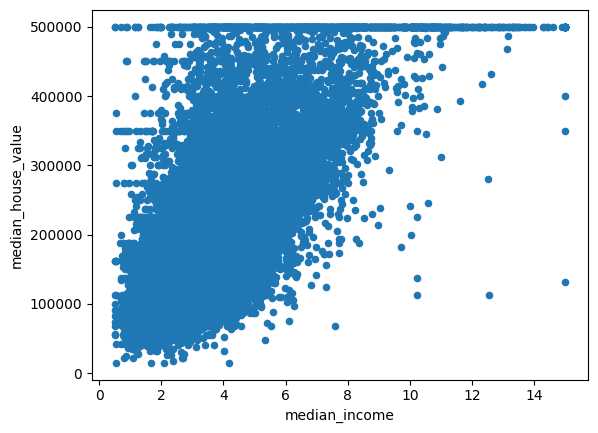

In [19]:
df.plot(kind='scatter', x='median_income', y='median_house_value')
plt.show()

### Handling categorical features

In [20]:
categorical_cols

['ocean_proximity']

In [21]:
# Initialize a dictionary for storing unique categories
categories_dict = {}

# Loop through each column and adds unique catories into dictionary
for column in categorical_cols:
  categories_dict[column] = list(df[column].unique())
  print("Unique Categories: \n")
  print(f"{column}: \n{categories_dict[column]}\n")


Unique Categories: 

ocean_proximity: 
['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']



### Distribution of categorical features

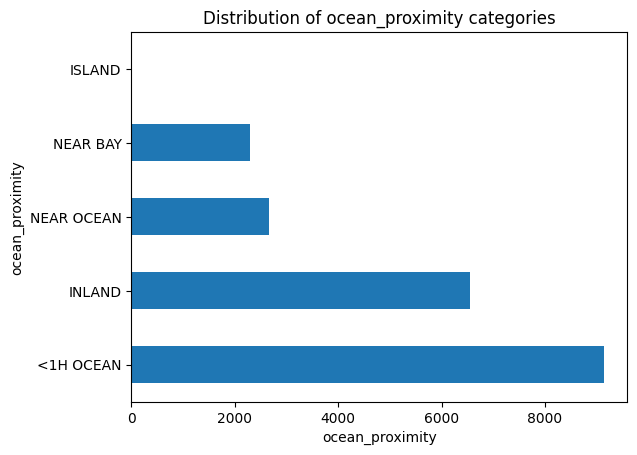

In [22]:
for column in categorical_cols:
  df[column].value_counts().plot(kind='barh')
  plt.title(f"Distribution of {column} categories")
  plt.xlabel(column)
  plt.show()

# Split Dataset into Training and Test Sets

In [23]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['median_house_value'])
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Shape of total dataset: {df.shape}")
print(f"Shape of train set: {X_train.shape}")
print(f"Shape of test set: {X_test.shape}")
print(f"train set is {X_train.shape[0]/df.shape[0]*100}% of total dataset")
print(f"test set is {X_test.shape[0]/df.shape[0]*100}% of total dataset")

Shape of total dataset: (20640, 12)
Shape of train set: (14448, 11)
Shape of test set: (6192, 11)
train set is 70.0% of total dataset
test set is 30.0% of total dataset


# Categorical Encoding

The categories of the ocean_proximity feature doesn't have a order relationship. We will use one hot encoding

In [24]:
# Use onehot encoding from scikit learn
from sklearn.preprocessing import OneHotEncoder

# Instantiate One hot encoder object
ohe = OneHotEncoder()

# Fit and transform(encode) the categorical feature
x_train_ohe = ohe.fit_transform(X_train[categorical_cols]).toarray()
x_test_ohe = ohe.transform(X_test[categorical_cols]).toarray()

# OneHotEncoder object has been fit to the data, displaying categories
ohe.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [25]:
# Reset the index of the original DataFrame and the encoded DataFrame
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
x_train_enc = pd.DataFrame(x_train_ohe, columns=ohe.get_feature_names_out(categorical_cols))
x_test_enc = pd.DataFrame(x_test_ohe, columns=ohe.get_feature_names_out(categorical_cols))

# Concatenate encoded df and original df and drop original categorical column
encoded_x_train = pd.concat([X_train, x_train_enc], axis=1)
encoded_x_test = pd.concat([X_test, x_test_enc], axis=1)

# Drop original categorical columns
encoded_x_train.drop(categorical_cols, axis=1,inplace=True)
encoded_x_test.drop(categorical_cols, axis=1,inplace=True)



In [26]:
encoded_x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bedrooms_per_house,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-118.02,33.93,35.0,2400,398,1218,408,4.1312,5.882353,0.975490,1.0,0.0,0.0,0.0,0.0
1,-117.09,32.79,20.0,2183,534,999,496,2.8631,4.401210,1.076613,0.0,0.0,0.0,0.0,1.0
2,-120.14,34.59,24.0,1601,282,731,285,4.2026,5.617544,0.989474,0.0,0.0,0.0,0.0,1.0
3,-121.00,39.26,14.0,810,151,302,138,3.1094,5.869565,1.094203,0.0,1.0,0.0,0.0,0.0
4,-122.45,37.77,52.0,3188,708,1526,664,3.3068,4.801205,1.066265,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14443,-117.96,33.78,35.0,1330,201,658,217,6.3700,6.129032,0.926267,1.0,0.0,0.0,0.0,0.0
14444,-117.43,34.02,33.0,3084,570,1753,449,3.0500,6.868597,1.269488,0.0,1.0,0.0,0.0,0.0
14445,-118.38,34.03,36.0,2101,569,1756,527,2.9344,3.986717,1.079696,1.0,0.0,0.0,0.0,0.0
14446,-121.96,37.58,15.0,3575,597,1777,559,5.7192,6.395349,1.067979,1.0,0.0,0.0,0.0,0.0


In [27]:
encoded_x_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bedrooms_per_house,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-119.01,36.06,25.0,1505,435,1392,359,1.6812,4.192201,1.211699,0.0,1.0,0.0,0.0,0.0
1,-119.46,35.14,30.0,2943,435,1565,584,2.5313,5.039384,0.744863,0.0,1.0,0.0,0.0,0.0
2,-122.44,37.80,52.0,3830,435,1310,963,3.4801,3.977155,0.451713,0.0,0.0,0.0,1.0,0.0
3,-118.72,34.28,17.0,3051,435,1705,495,5.7376,6.163636,0.878788,1.0,0.0,0.0,0.0,0.0
4,-121.93,36.62,34.0,2351,435,1063,428,3.7250,5.492991,1.016355,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6187,-121.90,37.36,47.0,1007,245,581,240,2.9545,4.195833,1.020833,1.0,0.0,0.0,0.0,0.0
6188,-117.32,34.11,41.0,1229,302,994,270,1.4891,4.551852,1.118519,0.0,1.0,0.0,0.0,0.0
6189,-117.91,33.67,16.0,7961,2276,5014,2116,3.5120,3.762287,1.075614,1.0,0.0,0.0,0.0,0.0
6190,-121.28,37.82,10.0,9205,1774,5935,1673,3.6500,5.502092,1.060371,0.0,1.0,0.0,0.0,0.0


Now that both X_train and X_test are encoded. Let's move on to scaling the features. It is important to normalize the features to a standized scale in order for the model to converge faster and perform better.

# Feature Scaling

The distribution of numerical data tend to be right skewed. Therefore, we will use the MinMaxScaler from scikit learn to scale the data to between 0 and 1

In [28]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMax scaler object
scaler = MinMaxScaler()

# Fit to data and perform the scaling transformation for both X_train and X_test
scaled_x_train = scaler.fit_transform(encoded_x_train)
scaled_x_test = scaler.transform(encoded_x_test)


In [29]:
scaled_x_train_df = pd.DataFrame(scaled_x_train, columns=scaler.get_feature_names_out())
scaled_x_train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bedrooms_per_house,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.630478,0.146809,0.666667,0.073502,0.061608,0.034054,0.066930,0.250431,0.035410,0.025379,1.0,0.0,0.0,0.0,0.0
1,0.723108,0.025532,0.372549,0.066851,0.082713,0.027916,0.081401,0.162977,0.024907,0.029375,0.0,0.0,0.0,0.0,1.0
2,0.419323,0.217021,0.450980,0.049011,0.043606,0.020404,0.046703,0.255355,0.033532,0.025931,0.0,0.0,0.0,0.0,1.0
3,0.333665,0.713830,0.254902,0.024766,0.023277,0.008380,0.022529,0.179963,0.035319,0.030070,0.0,1.0,0.0,0.0,0.0
4,0.189243,0.555319,1.000000,0.097655,0.109714,0.042686,0.109028,0.193577,0.027743,0.028966,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14443,0.636454,0.130851,0.666667,0.040705,0.031037,0.018358,0.035520,0.404829,0.037159,0.023433,1.0,0.0,0.0,0.0,0.0
14444,0.689243,0.156383,0.627451,0.094467,0.088299,0.049048,0.073672,0.175867,0.042403,0.036998,0.0,1.0,0.0,0.0,0.0
14445,0.594622,0.157447,0.686275,0.064337,0.088144,0.049133,0.086499,0.167894,0.021967,0.029497,1.0,0.0,0.0,0.0,0.0
14446,0.238048,0.535106,0.274510,0.109517,0.092489,0.049721,0.091761,0.359947,0.039047,0.029034,1.0,0.0,0.0,0.0,0.0


Let's show the distribution again after scaling.

In [30]:
# Statistics of scaled X_train
scaled_x_train_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bedrooms_per_house,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,0.474691,0.329858,0.540694,0.081010,0.083617,0.039937,0.082235,0.232893,0.032259,0.030222,0.443868,0.319283,0.000277,0.112195,0.124377
std,0.199495,0.227207,0.247326,0.066301,0.065144,0.031958,0.062855,0.131371,0.017399,0.017686,0.496856,0.466215,0.016637,0.315618,0.330023
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253984,0.147872,0.333333,0.044590,0.045779,0.022086,0.045881,0.142572,0.025245,0.026615,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.581673,0.182979,0.549020,0.065257,0.067660,0.032652,0.067423,0.209597,0.030801,0.028303,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.631474,0.550000,0.705882,0.097080,0.100403,0.048320,0.099655,0.293663,0.036674,0.030312,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
# Statistics of the unscaled X_train df
encoded_x_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bedrooms_per_house,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.584102,35.650669,28.575374,2644.939230,539.828281,1427.927326,501.070598,3.876892,5.438125,1.098033,0.443868,0.319283,0.000277,0.112195,0.124377
std,2.002930,2.135742,12.613634,2163.054433,419.786747,1140.225190,382.221220,1.904908,2.453569,0.447498,0.496856,0.466215,0.016637,0.315618,0.330023
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.888889,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.940000,18.000000,1456.750000,296.000000,791.000000,280.000000,2.567225,4.448928,1.006783,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.510000,34.270000,29.000000,2131.000000,437.000000,1168.000000,411.000000,3.539100,5.232422,1.049492,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.720000,37.000000,3169.250000,648.000000,1727.000000,607.000000,4.758075,6.060692,1.100328,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,141.909091,25.636364,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
scaled_x_test_df = pd.DataFrame(scaled_x_test, columns=scaler.get_feature_names_out())
scaled_x_test_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bedrooms_per_house,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.531873,0.373404,0.470588,0.046069,0.067349,0.038930,0.058872,0.081468,0.023424,0.034714,0.0,1.0,0.0,0.0,0.0
1,0.487052,0.275532,0.568627,0.090146,0.067349,0.043779,0.095872,0.140095,0.029432,0.016264,0.0,1.0,0.0,0.0,0.0
2,0.190239,0.558511,1.000000,0.117333,0.067349,0.036632,0.158198,0.205528,0.021899,0.004678,0.0,0.0,0.0,1.0,0.0
3,0.560757,0.184043,0.313725,0.093456,0.067349,0.047703,0.081237,0.361216,0.037404,0.021557,1.0,0.0,0.0,0.0,0.0
4,0.241036,0.432979,0.647059,0.072000,0.067349,0.029709,0.070219,0.222418,0.032649,0.026994,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6187,0.244024,0.511702,0.901961,0.030805,0.037865,0.016200,0.039303,0.169280,0.023450,0.027171,1.0,0.0,0.0,0.0,0.0
6188,0.700199,0.165957,0.784314,0.037609,0.046710,0.027775,0.044236,0.068220,0.025975,0.031031,0.0,1.0,0.0,0.0,0.0
6189,0.641434,0.119149,0.294118,0.243954,0.353042,0.140447,0.347805,0.207728,0.020376,0.029336,1.0,0.0,0.0,0.0,0.0
6190,0.305777,0.560638,0.176471,0.282084,0.275140,0.166260,0.274955,0.217245,0.032713,0.028733,0.0,1.0,0.0,0.0,0.0


In [33]:
# Statistics of scaled X_test
scaled_x_test_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bedrooms_per_house,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000
mean,0.479471,0.323189,0.544884,0.080072,0.082071,0.039708,0.081396,0.231463,0.032044,0.030601,0.439761,0.312984,0.000161,0.108043,0.139050
std,0.199671,0.227231,0.245481,0.068179,0.064932,0.031229,0.062916,0.130203,0.017882,0.025950,0.496398,0.463746,0.012708,0.310459,0.346027
min,0.009960,-0.001064,0.000000,0.000123,0.000155,0.000140,0.000164,0.000000,-0.000303,-0.008384,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.256972,0.145745,0.333333,0.043801,0.046245,0.021721,0.045552,0.141522,0.025045,0.026461,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.585657,0.178723,0.549020,0.064782,0.067349,0.032456,0.066601,0.208625,0.030710,0.028229,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.633466,0.547872,0.705882,0.094782,0.097455,0.048039,0.098051,0.291189,0.036452,0.030286,1.000000,1.000000,0.000000,0.000000,0.000000
max,0.973108,0.990426,1.000000,1.205149,0.963532,0.456907,0.880941,1.000000,0.933515,1.333174,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
# Statistics of the unscaled X_test df
encoded_x_test.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bedrooms_per_house,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000
mean,-119.536109,35.587976,28.789083,2614.352067,529.863534,1419.758721,495.967539,3.856156,5.407708,1.107623,0.439761,0.312984,0.000161,0.108043,0.139050
std,2.004694,2.135971,12.519541,2224.351073,418.419862,1114.208253,382.589931,1.887973,2.521666,0.656623,0.496398,0.463746,0.012708,0.310459,0.346027
min,-124.250000,32.540000,1.000000,6.000000,2.000000,8.000000,2.000000,0.499900,0.846154,0.121204,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.770000,33.920000,18.000000,1431.000000,299.000000,778.000000,278.000000,2.552000,4.420726,1.002880,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.470000,34.230000,29.000000,2115.500000,435.000000,1161.000000,406.000000,3.525000,5.219578,1.047619,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-117.990000,37.700000,37.000000,3094.250000,629.000000,1717.000000,597.250000,4.722200,6.029360,1.099671,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.580000,41.860000,52.000000,39320.000000,6210.000000,16305.000000,5358.000000,15.000100,132.533333,34.066667,1.000000,1.000000,1.000000,1.000000,1.000000


The above shows that we have successfully scaled our features to between 0 and 1.

# Feature Engineering



I will drop irrelevant features

* Low correlation
* Lasso Regression will get rid of useless features

In [35]:
corr_matrix['median_house_value'].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
rooms_per_house,0.151948
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049457
population,-0.024650
bedrooms_per_house,-0.045637
longitude,-0.045967


Based on the above correlation table. I will drop the following features since they have a very low correlation to the target feature:

* total_bedrooms
* population
* bedrooms_per_house
* longitude
* latitude

In [36]:
scaled_x_train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bedrooms_per_house,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.630478,0.146809,0.666667,0.073502,0.061608,0.034054,0.066930,0.250431,0.035410,0.025379,1.0,0.0,0.0,0.0,0.0
1,0.723108,0.025532,0.372549,0.066851,0.082713,0.027916,0.081401,0.162977,0.024907,0.029375,0.0,0.0,0.0,0.0,1.0
2,0.419323,0.217021,0.450980,0.049011,0.043606,0.020404,0.046703,0.255355,0.033532,0.025931,0.0,0.0,0.0,0.0,1.0
3,0.333665,0.713830,0.254902,0.024766,0.023277,0.008380,0.022529,0.179963,0.035319,0.030070,0.0,1.0,0.0,0.0,0.0
4,0.189243,0.555319,1.000000,0.097655,0.109714,0.042686,0.109028,0.193577,0.027743,0.028966,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14443,0.636454,0.130851,0.666667,0.040705,0.031037,0.018358,0.035520,0.404829,0.037159,0.023433,1.0,0.0,0.0,0.0,0.0
14444,0.689243,0.156383,0.627451,0.094467,0.088299,0.049048,0.073672,0.175867,0.042403,0.036998,0.0,1.0,0.0,0.0,0.0
14445,0.594622,0.157447,0.686275,0.064337,0.088144,0.049133,0.086499,0.167894,0.021967,0.029497,1.0,0.0,0.0,0.0,0.0
14446,0.238048,0.535106,0.274510,0.109517,0.092489,0.049721,0.091761,0.359947,0.039047,0.029034,1.0,0.0,0.0,0.0,0.0


In [37]:
#scaled_x_train_df.drop(columns=['total_bedrooms', 'population',
                               # 'longitude', 'latitude', 'households'], inplace=True)

#scaled_x_test_df.drop(columns=['total_bedrooms', 'population',
                               #'longitude', 'latitude', 'households'], inplace=True)


# Model Selection


## PyTorch Linear Regression from scratch

### My own Linear Regression class

In [38]:
import torch
import torch.nn as nn

# Implementing a linear regression model from scratch

class my_linear_regression_model(nn.Module):
  def __init__(self, in_features, out_features):
    super(my_linear_regression_model, self).__init__()
    self.in_features = in_features
    self.out_features = out_features
    # Randomly initialize weight and biases as a learnable parameter
    self.weight = nn.Parameter(torch.randn(self.out_features, self.in_features, dtype=torch.float32))
    self.bias = nn.Parameter(torch.zeros(self.out_features, dtype=torch.float32))

  def forward(self, x):
    return torch.matmul(x, self.weight.T) + self.bias

### Load dataset into tensor

In [39]:
# Turn scaled encoded dataframe into tensor

X_train_tensor = torch.tensor(scaled_x_train_df.values, dtype=torch.float32)
X_test_tensor = torch.tensor(scaled_x_test_df.values, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(-1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(-1)


### Training loop (Linear Regression)

In [87]:
# Store losses
total_loss = []
test_loss = []

# Instantiate model
linear_regression = my_linear_regression_model(15,1)

# Set up Lasso Regression's lamdba term
lmda = 0.01

# Instantiate loss function
loss_fn = nn.MSELoss()

# Instantiate optimizer
optimizer = torch.optim.SGD(linear_regression.parameters(), lr=0.3)

# Training loop
epochs = 2000
for epoch in range(epochs):
  # Turn on training mode
  linear_regression.train()

  # Forward pass
  y_pred = linear_regression(X_train_tensor)

  # Calculate Loss
  mse_loss = loss_fn(y_pred, y_train_tensor)

  # # Compute Lasso regularization
  l1_loss = 0
  for param in linear_regression.parameters():
    l1_loss += torch.norm(param, 1)

  lasso_loss = mse_loss + lmda * l1_loss

  total_loss.append(lasso_loss)
  # Zero out gradient to prevent accumulation
  optimizer.zero_grad()

  # Back propagation
  lasso_loss.backward()

  # Update parameters from SDG
  optimizer.step()

  # Testig

  # Put model in evaluation mode
  linear_regression.eval()

  with torch.inference_mode():
    # Forward pass
    test_pred = linear_regression(X_test_tensor)

    # Calculate Loss
    eval_loss = loss_fn(test_pred, y_test_tensor)
    test_loss.append(eval_loss)


    print(f"epoch: {epoch}, train loss: {lasso_loss}, test loss: {eval_loss}")

epoch: 0, train loss: 56214605824.0, test loss: 14329126912.0
epoch: 1, train loss: 14468568064.0, test loss: 11433076736.0
epoch: 2, train loss: 11618097152.0, test loss: 10812553216.0
epoch: 3, train loss: 10978737152.0, test loss: 10402918400.0
epoch: 4, train loss: 10570792960.0, test loss: 10087953408.0
epoch: 5, train loss: 10253847552.0, test loss: 9831176192.0
epoch: 6, train loss: 9996896256.0, test loss: 9617204224.0
epoch: 7, train loss: 9782768640.0, test loss: 9434517504.0
epoch: 8, train loss: 9600120832.0, test loss: 9275540480.0
epoch: 9, train loss: 9441173504.0, test loss: 9134854144.0
epoch: 10, train loss: 9300464640.0, test loss: 9008575488.0
epoch: 11, train loss: 9174070272.0, test loss: 8893844480.0
epoch: 12, train loss: 9059113984.0, test loss: 8788516864.0
epoch: 13, train loss: 8953449472.0, test loss: 8690957312.0
epoch: 14, train loss: 8855439360.0, test loss: 8599901184.0
epoch: 15, train loss: 8763828224.0, test loss: 8514356736.0
epoch: 16, train loss: 

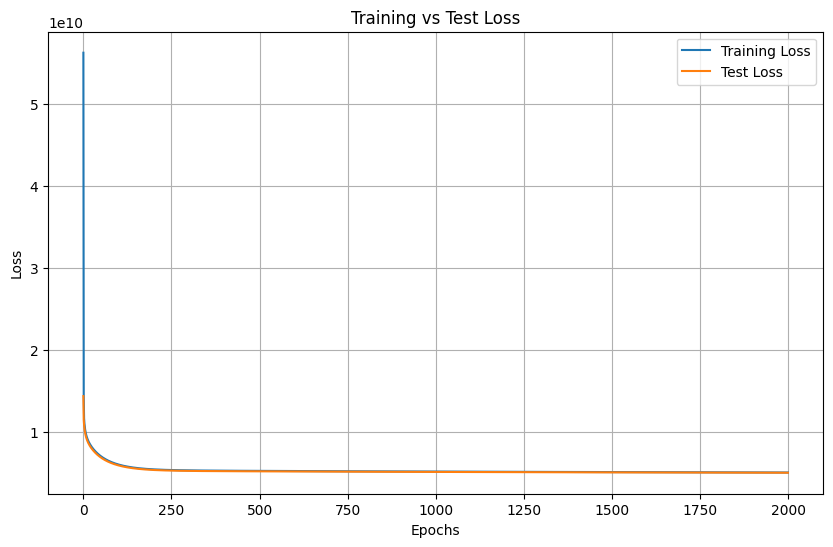

In [88]:
# Visualize the losses
import matplotlib.pyplot as plt
def plot_losses(train_losses, test_losses, epochs):

  # Convert loss tensors to values (detach them from the computational graph)
  train_losses = [loss.detach().item() for loss in train_losses]
  test_losses = [loss.detach().item() for loss in test_losses]

  # Plot the training and test losses
  plt.figure(figsize=(10, 6))
  plt.plot(range(epochs), train_losses, label='Training Loss')
  plt.plot(range(epochs), test_losses, label='Test Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Training vs Test Loss')
  plt.legend()
  plt.grid(True)
  plt.show()

plot_losses(total_loss, test_loss, 2000)


## PyTorch Decision Tree from scratch

## Using Pre-built models

### Using PyTorch nn.Linear

In [72]:
class linear_regression_model(nn.Module):
  def __init__(self, in_feature, out_feature):
    super(linear_regression_model, self).__init__()
    self.in_feature = in_feature
    self.out_feature = out_feature
    self.linear = nn.Linear(in_feature, out_feature)

  def forward(self, x):
    return self.linear(x)

In [89]:
# Store losses
total_loss_pb = []
test_loss_pb = []

# Instantiate model
lin_reg = linear_regression_model(15, 1)


# Instantiate loss function
loss_fn_pb = nn.MSELoss()

# Instantiate optimizer
optimizer_pb = torch.optim.SGD(lin_reg.parameters(), lr=0.3)

# Training loop
epochs = 2000
for epoch in range(epochs):
  # Turn on training mode
  lin_reg.train()

  # Forward pass
  y_pred = lin_reg(X_train_tensor)

  # Calculate Loss
  loss_pb = loss_fn_pb(y_pred, y_train_tensor)

  # Store the loss
  total_loss_pb.append(loss_pb)

  # Zero out gradient to prevent accumulation
  optimizer_pb.zero_grad()

  # Back propagation
  loss_pb.backward()

  # Update parameters from SDG
  optimizer_pb.step()

  # Testing

  # Put model in evaluation mode
  lin_reg.eval()

  with torch.inference_mode():
    # Forward pass
    test_pred = lin_reg(X_test_tensor)

    # Calculate Loss
    test_loss = loss_fn_pb(test_pred, y_test_tensor)
    test_loss_pb.append(test_loss)


    print(f"epoch: {epoch}, train loss: {loss_pb}, test loss: {test_loss}")

epoch: 0, train loss: 56214622208.0, test loss: 14329189376.0
epoch: 1, train loss: 14468630528.0, test loss: 11433125888.0
epoch: 2, train loss: 11618142208.0, test loss: 10812589056.0
epoch: 3, train loss: 10978768896.0, test loss: 10402945024.0
epoch: 4, train loss: 10570815488.0, test loss: 10087972864.0
epoch: 5, train loss: 10253860864.0, test loss: 9831189504.0
epoch: 6, train loss: 9996905472.0, test loss: 9617215488.0
epoch: 7, train loss: 9782774784.0, test loss: 9434525696.0
epoch: 8, train loss: 9600123904.0, test loss: 9275547648.0
epoch: 9, train loss: 9441173504.0, test loss: 9134859264.0
epoch: 10, train loss: 9300463616.0, test loss: 9008579584.0
epoch: 11, train loss: 9174070272.0, test loss: 8893848576.0
epoch: 12, train loss: 9059112960.0, test loss: 8788519936.0
epoch: 13, train loss: 8953445376.0, test loss: 8690959360.0
epoch: 14, train loss: 8855434240.0, test loss: 8599903232.0
epoch: 15, train loss: 8763823104.0, test loss: 8514357760.0
epoch: 16, train loss: 

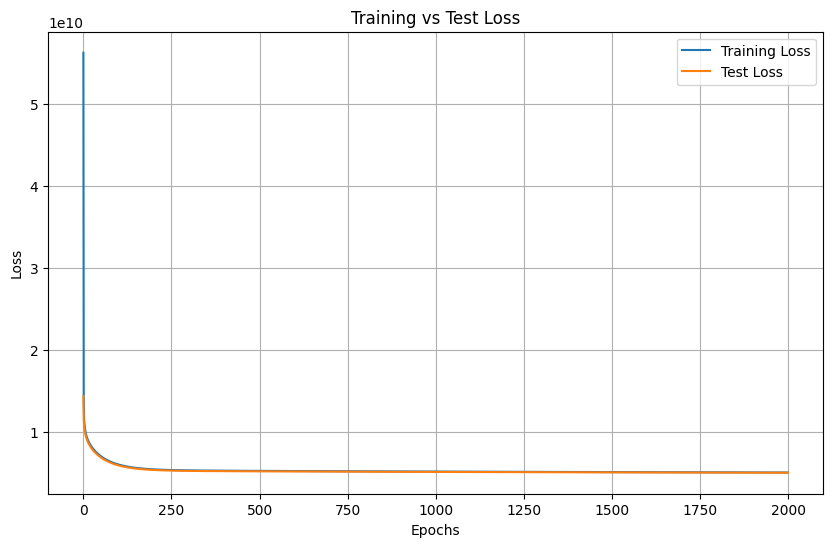

In [90]:
# Visualize the results of the pre-built model

plot_losses(total_loss_pb, test_loss_pb, 2000)


### Try using sklearn linear regression model

In [45]:
X_test_tensor

tensor([[0.5319, 0.3734, 0.4706,  ..., 0.0000, 0.0000, 0.0000],
        [0.4871, 0.2755, 0.5686,  ..., 0.0000, 0.0000, 0.0000],
        [0.1902, 0.5585, 1.0000,  ..., 0.0000, 1.0000, 0.0000],
        ...,
        [0.6414, 0.1191, 0.2941,  ..., 0.0000, 0.0000, 0.0000],
        [0.3058, 0.5606, 0.1765,  ..., 0.0000, 0.0000, 0.0000],
        [0.6086, 0.1702, 0.3137,  ..., 0.0000, 0.0000, 0.0000]])

In [46]:
from sklearn.linear_model import LinearRegression

# Instantiate linear regression model
sk_lin_reg = LinearRegression()

# Fit datasets into model
sk_lin_reg.fit(X_train_tensor, y_train_tensor)

# Predict using the model
y_predictions = sk_lin_reg.predict(X_test_tensor)
y_predictions_df = pd.DataFrame(y_predictions, columns = ['house_price'])
y_predictions_df

,house_price
0,57409.437500
1,123014.250000
2,266983.156250
3,265980.187500
4,261664.281250
...,...
6187,223745.640625
6188,67910.875000
6189,279691.375000
6190,115506.562500


Create a dataframe for comparing the predicted output and actual output

In [47]:
predicted_df = pd.concat([X_test, y_predictions_df, y_test], axis=1)
predicted_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_house,bedrooms_per_house,house_price,median_house_value
0,-119.01,36.06,25.0,1505.0,435.0,1392.0,359.0,1.6812,INLAND,4.192201,1.211699,57409.43750,452600.0
1,-119.46,35.14,30.0,2943.0,435.0,1565.0,584.0,2.5313,INLAND,5.039384,0.744863,123014.25000,NaN
2,-122.44,37.80,52.0,3830.0,435.0,1310.0,963.0,3.4801,NEAR BAY,3.977155,0.451713,266983.15625,NaN
3,-118.72,34.28,17.0,3051.0,435.0,1705.0,495.0,5.7376,<1H OCEAN,6.163636,0.878788,265980.18750,341300.0
4,-121.93,36.62,34.0,2351.0,435.0,1063.0,428.0,3.7250,NEAR OCEAN,5.492991,1.016355,261664.28125,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123100.0
17505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,237500.0
13512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67300.0
10842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218400.0


In [48]:
# Determine the error
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_test_tensor, y_predictions)
lin_mse

5027382300.0